Basic missing value imputation techniques:

* constant (i.e. 0)
* mean
* median
* mode or most frequent

In [15]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv("./diabetes.csv")

In [7]:
# Mean Imputation

df_mean = df.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
df_mean.iloc[:, :] = mean_imputer.fit_transform(df_mean)

In [8]:
# Median Imputation

df_median = df.copy(deep=True)
median_imputer = SimpleImputer(strategy="median")
df_median.iloc[:, :] = median_imputer.fit_transform(df_median)

In [9]:
# Mode Imputation

df_mode = df.copy(deep=True)
mode_imputer = SimpleImputer(strategy="most_frequent")
df_mode.iloc[:, :] = mode_imputer.fit_transform(df_mode)

In [10]:
# Constant Imputation

df_constant = df.copy(deep=True)
constant_imputer = SimpleImputer(strategy="constant", fill_value=0)
df_constant.iloc[:, :] = constant_imputer.fit_transform(df_constant)

In [11]:
# Scatterplot of the Imputation

C:\Users\ismiguzel\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


<AxesSubplot:title={'center':'Mean Imputation'}, xlabel='Serum_Insulin', ylabel='Glucose'>

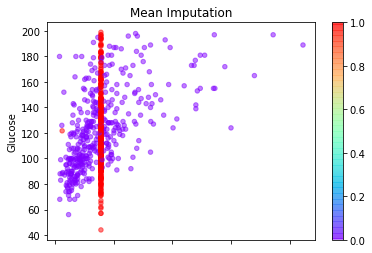

In [13]:
nullity = df["Serum_Insulin"].isnull() +  df["Glucose"].isnull() 

df_mean.plot(x="Serum_Insulin", y="Glucose", kind="scatter", alpha=0.5, 
            c=nullity, cmap="rainbow", title="Mean Imputation")

C:\Users\ismiguzel\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


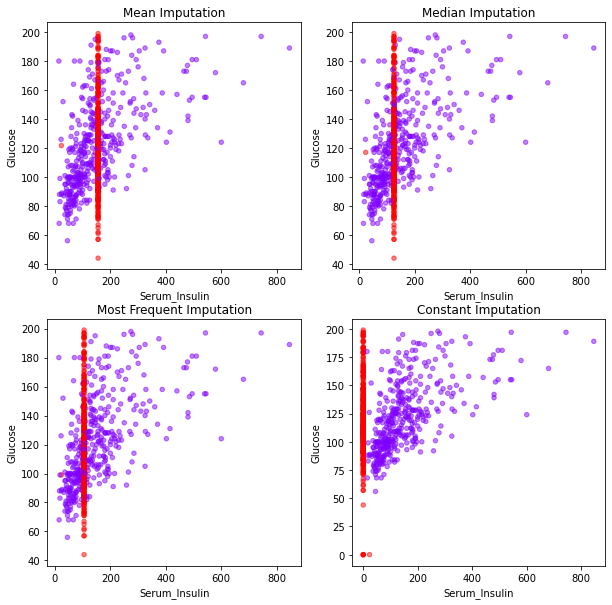

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
nullity = df["Serum_Insulin"].isnull() +  df["Glucose"].isnull() 
imputations = {"Mean Imputation": df_mean,
                "Median Imputation": df_median,
                "Most Frequent Imputation": df_mode,
                "Constant Imputation": df_constant}
for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x="Serum_Insulin", y="Glucose", kind="scatter", alpha=0.5, 
                            c=nullity, cmap="rainbow", ax=ax, colorbar=False, title=df_key)


In [18]:
# There is correlation between glucose adn serum_insulin. However with this kind of imputation we are not able to capture this correlation between the variables. 
# Our imputation brings bias to the dataset
# We should use more robust imputation techniques